In [1]:
pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 28.8 MB/s eta 0:00:01
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=317abe3fce385713a74ede61d42fd03ab622a84267733ae4e2a3253c84d7e95c
  Stored in directory: /home/ec2-user/.cache/pip/wheels/31/1e/58/db8cfe08f81c72d8c31bc58690ce63d9e3d93a6e97dca5ddb4
Successfully built scikit-fuzzy
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from skfuzzy.cluster import cmeans
from sklearn.metrics import silhouette_score

## Defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'danhtran358-data-445-bucket'
bucket = s3.Bucket(bucket_name)

## Defining the csv file
file_key = 'customers.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
customers = pd.read_csv(file_content_stream)
customers.head()

,ID,Visit_Time,Average_Expense,Sex,Age
0,1,3,5.7,0,10
1,2,5,14.5,0,27
2,3,16,33.5,0,32
3,4,5,15.9,0,30
4,5,16,24.9,0,23


In [3]:
## Dropping ID
customers = customers.drop(columns = 'ID', axis = 1)
customers.head()

,Visit_Time,Average_Expense,Sex,Age
0,3,5.7,0,10
1,5,14.5,0,27
2,16,33.5,0,32
3,5,15.9,0,30
4,16,24.9,0,23


In [4]:
## Transforming variables to 0-1 scale
scaler = MinMaxScaler()

customers[['Visit_Time_0_1', 'Average_Expense_0_1', 'Age_0_1']] = scaler.fit_transform(customers[['Visit_Time', 'Average_Expense', 'Age']])
customers.head()

,Visit_Time,Average_Expense,Sex,Age,Visit_Time_0_1,Average_Expense_0_1,Age_0_1
0,3,5.7,0,10,0.117647,0.041096,0.051282
1,5,14.5,0,27,0.235294,0.342466,0.487179
2,16,33.5,0,32,0.882353,0.993151,0.615385
3,5,15.9,0,30,0.235294,0.390411,0.564103
4,16,24.9,0,23,0.882353,0.698630,0.384615


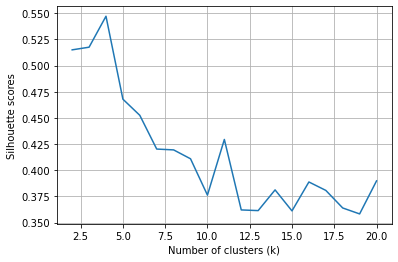

In [6]:
## Defind a list to store the Silhouette scores
results = list()

for i in range(2, 21):
    
    ## Clustering the data
    kmeans_md = KMeans(n_clusters = i, n_init = 20).fit(customers[['Sex', 'Visit_Time_0_1', 'Average_Expense_0_1', 'Age_0_1']])
    kmeans_label = kmeans_md.labels_
    
    ## Computing the Silhouette score
    results.append(silhouette_score(customers[['Sex', 'Visit_Time_0_1', 'Average_Expense_0_1', 'Age_0_1']], kmeans_label))
    
## Visualizing the silhouette scores
plt.plot(range(2, 21), results)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette scores')
plt.grid()
plt.show()

In [7]:
X = customers[['Sex', 'Visit_Time_0_1', 'Average_Expense_0_1', 'Age_0_1']]

## Clustering the data into 4 cluster using cmeans
fc, W, u0, d, jm, p, pc = cmeans(X.T, c = 4, m = 1.25, error = 1e-6, maxiter = 1000)

In [11]:
customers['cluster'] = np.nan
customers.head()

,Visit_Time,Average_Expense,Sex,Age,Visit_Time_0_1,Average_Expense_0_1,Age_0_1,cluster
0,3,5.7,0,10,0.117647,0.041096,0.051282,NaN
1,5,14.5,0,27,0.235294,0.342466,0.487179,NaN
2,16,33.5,0,32,0.882353,0.993151,0.615385,NaN
3,5,15.9,0,30,0.235294,0.390411,0.564103,NaN
4,16,24.9,0,23,0.882353,0.698630,0.384615,NaN


In [12]:
W[0]

array([1.15123827e-03, 2.15571286e-05, 4.79199448e-02, 5.42096030e-05,
       2.02666537e-03, 1.55442769e-04, 3.96219185e-03, 1.28494483e-04,
       1.75331689e-05, 1.14632855e-03, 2.79695641e-04, 1.18702039e-04,
       3.96219185e-03, 3.99883263e-07, 1.42244001e-04, 4.01796301e-04,
       1.94874115e-04, 6.36403787e-09, 4.29053071e-03, 9.69177849e-01,
       3.53569255e-07, 9.83756725e-01, 1.02209205e-10, 9.90954446e-01,
       9.99977624e-01, 1.35329727e-09, 3.21427740e-06, 9.99662947e-01,
       7.77640391e-06, 2.75196807e-07, 9.43089935e-05, 9.99996703e-01,
       9.99998386e-01, 9.94415535e-01, 2.75196807e-07, 9.10902598e-07,
       9.99465370e-01, 9.34425272e-05, 2.57039914e-06, 3.53569255e-07,
       3.67936106e-09, 1.31333455e-06, 3.76406965e-08, 5.24372638e-05,
       9.99576311e-01, 9.99662947e-01, 3.53842331e-02, 3.78924817e-06,
       1.06034586e-07, 9.90954446e-01, 9.44446084e-11, 7.10190570e-01,
       9.99208182e-01, 1.95168110e-06, 4.88142405e-03, 3.83603622e-08,
      

In [13]:
customers['cluster'] = np.where(W[0] > 0.7, 1, customers['cluster'])
customers['cluster'] = np.where(W[1] > 0.7, 2, customers['cluster'])
customers['cluster'] = np.where(W[2] > 0.7, 3, customers['cluster'])
customers['cluster'] = np.where(W[3] > 0.7, 4, customers['cluster'])
customers.head()

,Visit_Time,Average_Expense,Sex,Age,Visit_Time_0_1,Average_Expense_0_1,Age_0_1,cluster
0,3,5.7,0,10,0.117647,0.041096,0.051282,4.0
1,5,14.5,0,27,0.235294,0.342466,0.487179,4.0
2,16,33.5,0,32,0.882353,0.993151,0.615385,4.0
3,5,15.9,0,30,0.235294,0.390411,0.564103,4.0
4,16,24.9,0,23,0.882353,0.698630,0.384615,4.0


In [14]:
cluster_1 = customers[customers['cluster'] == 1].reset_index(drop = True)
cluster_1.describe()

,Visit_Time,Average_Expense,Sex,Age,Visit_Time_0_1,Average_Expense_0_1,Age_0_1,cluster
count,16.000000,16.000000,16.0,16.000000,16.000000,16.000000,16.000000,16.0
mean,12.250000,25.362500,1.0,31.187500,0.661765,0.714469,0.594551,1.0
std,2.955221,4.336339,0.0,8.336416,0.173837,0.148505,0.213754,0.0
min,8.000000,17.800000,1.0,17.000000,0.411765,0.455479,0.230769,1.0
25%,10.000000,21.100000,1.0,26.000000,0.529412,0.568493,0.461538,1.0
50%,12.000000,25.450000,1.0,28.500000,0.647059,0.717466,0.525641,1.0
75%,13.250000,28.275000,1.0,36.750000,0.720588,0.814212,0.737179,1.0
max,18.000000,33.700000,1.0,47.000000,1.000000,1.000000,1.000000,1.0


In [15]:
cluster_2 = customers[customers['cluster'] == 2].reset_index(drop = True)
cluster_2.describe()

,Visit_Time,Average_Expense,Sex,Age,Visit_Time_0_1,Average_Expense_0_1,Age_0_1,cluster
count,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.0
mean,3.300000,6.840000,1.0,10.700000,0.135294,0.080137,0.069231,2.0
std,1.702939,2.243113,0.0,2.263233,0.100173,0.076819,0.058032,0.0
min,1.000000,4.500000,1.0,8.000000,0.000000,0.000000,0.000000,2.0
25%,3.000000,4.925000,1.0,8.500000,0.117647,0.014555,0.012821,2.0
50%,3.000000,6.400000,1.0,11.000000,0.117647,0.065068,0.076923,2.0
75%,3.750000,8.250000,1.0,12.000000,0.161765,0.128425,0.102564,2.0
max,6.000000,11.000000,1.0,15.000000,0.294118,0.222603,0.179487,2.0


In [16]:
cluster_3 = customers[customers['cluster'] == 3].reset_index(drop = True)
cluster_3.describe()

,Visit_Time,Average_Expense,Sex,Age,Visit_Time_0_1,Average_Expense_0_1,Age_0_1,cluster
count,15.000000,15.000000,15.0,15.000000,15.000000,15.000000,15.000000,15.0
mean,7.066667,13.653333,1.0,18.666667,0.356863,0.313470,0.273504,3.0
std,1.624221,3.822839,0.0,2.609506,0.095542,0.130919,0.066910,0.0
min,4.000000,10.200000,1.0,15.000000,0.176471,0.195205,0.179487,3.0
25%,6.500000,10.900000,1.0,17.000000,0.323529,0.219178,0.230769,3.0
50%,7.000000,12.000000,1.0,17.000000,0.352941,0.256849,0.230769,3.0
75%,8.000000,15.350000,1.0,21.000000,0.411765,0.371575,0.333333,3.0
max,10.000000,23.800000,1.0,23.000000,0.529412,0.660959,0.384615,3.0


In [17]:
cluster_4 = customers[customers['cluster'] == 4].reset_index(drop = True)
cluster_4.describe()

,Visit_Time,Average_Expense,Sex,Age,Visit_Time_0_1,Average_Expense_0_1,Age_0_1,cluster
count,19.000000,19.000000,19.0,19.000000,19.000000,19.000000,19.000000,19.0
mean,8.894737,18.131579,0.0,21.052632,0.464396,0.466835,0.334683,4.0
std,5.097873,8.454522,0.0,7.856163,0.299875,0.289538,0.201440,0.0
min,3.000000,4.600000,0.0,9.000000,0.117647,0.003425,0.025641,4.0
25%,4.500000,13.250000,0.0,15.500000,0.205882,0.299658,0.192308,4.0
50%,7.000000,17.400000,0.0,21.000000,0.352941,0.441781,0.333333,4.0
75%,14.000000,24.350000,0.0,27.000000,0.764706,0.679795,0.487179,4.0
max,17.000000,33.500000,0.0,33.000000,0.941176,0.993151,0.641026,4.0


In [8]:
## Group 1, 2 3 are all male group while group 4 is female group
## Group 1, 3, 2 are in the descending order of age, time spent, and money spent.

In [8]:
fc

array([[9.98298519e-01, 6.64643724e-01, 7.20887976e-01, 5.95511258e-01],
       [9.98288083e-01, 1.35746365e-01, 8.13360656e-02, 7.14023876e-02],
       [9.99300260e-01, 3.61892849e-01, 3.16221837e-01, 2.78245242e-01],
       [1.10545495e-05, 4.64138988e-01, 4.66623086e-01, 3.34721913e-01]])

In [9]:
W

array([[1.15123827e-03, 2.15571286e-05, 4.79199448e-02, 5.42096030e-05,
        2.02666537e-03, 1.55442769e-04, 3.96219185e-03, 1.28494483e-04,
        1.75331689e-05, 1.14632855e-03, 2.79695641e-04, 1.18702039e-04,
        3.96219185e-03, 3.99883263e-07, 1.42244001e-04, 4.01796301e-04,
        1.94874115e-04, 6.36403787e-09, 4.29053071e-03, 9.69177849e-01,
        3.53569255e-07, 9.83756725e-01, 1.02209205e-10, 9.90954446e-01,
        9.99977624e-01, 1.35329727e-09, 3.21427740e-06, 9.99662947e-01,
        7.77640391e-06, 2.75196807e-07, 9.43089935e-05, 9.99996703e-01,
        9.99998386e-01, 9.94415535e-01, 2.75196807e-07, 9.10902598e-07,
        9.99465370e-01, 9.34425272e-05, 2.57039914e-06, 3.53569255e-07,
        3.67936106e-09, 1.31333455e-06, 3.76406965e-08, 5.24372638e-05,
        9.99576311e-01, 9.99662947e-01, 3.53842331e-02, 3.78924817e-06,
        1.06034586e-07, 9.90954446e-01, 9.44446084e-11, 7.10190570e-01,
        9.99208182e-01, 1.95168110e-06, 4.88142405e-03, 3.836036

In [10]:
pc

0.9763672949073475